In [1]:
## teh frist one is going to be a leave one out approach for the sites vb

In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import os
import pickle
import dask.dataframe as dd

import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import subprocess
import random

In [2]:
## for the final generation we have 31 unique sites
# 31*0.8 is 24.8
## so i am going to be using 25 for trianing and  6 for testing 

In [3]:
#path_ldp_af = '/carnegie/nobackup/scratch/xwu/grenet/merged_frequency/merged_hapFIRE_allele_frequency_LDpruned.txt'

In [4]:
#sample_names = pd.read_csv(path_ldp_af, sep = '\t', nrows= 1).columns.values

# Open a file for writing
#with open ('sample_names.txt', 'w') as file:
#    for item in sample_names:
#        file.write(f"{item}\n")

In [5]:
#path_deltap = '/carnegie/nobackup/scratch/xwu/grenet/merged_frequency/merged_hapFIRE_delta_p.txt'

In [6]:
#deltap = dd.read_csv(path_deltap, sep = '\t', header= None)

In [7]:
#deltap = deltap.compute()

In [8]:
#delta_p_file = '/carnegie/nobackup/scratch/tbellagio/gea_grene-net/leave_1_out_sv/delta_p.csv'


In [9]:
#deltap.columns = sample_names

In [10]:
#deltap.to_csv('/carnegie/nobackup/scratch/tbellagio/gea_grene-net/leave_1_out/delta_p.csv', index=None)

In [11]:
#pd.read_csv('../leave_1_out/split_number_0/environment_lea_full_genome.csv')


In [12]:
#finalgen_samples = pd.read_csv('../final_gen.csv')['sample_name']

In [2]:
## cahnge to first gen samples 
last_gen = pd.read_csv('../key_files/final_gen.csv')['sample_name']

In [3]:
wd = '/carnegie/nobackup/scratch/tbellagio/gea_grene-net/lfmm_full_last_gen//'

In [4]:
#clim_sites_during_exp = pd.read_csv('/carnegie/nobackup/scratch/tbellagio/grene/data/bioclimvars_experimental_sites_era5.csv')
## now we are just using the 2018 data 
clim_sites_during_exp = pd.read_csv('../key_files/bioclimvars_experimental_sites_era5.csv')

In [5]:
biovars = clim_sites_during_exp.columns[1:]

In [6]:
## only bio1 and bio17
#biovars = ['bio1', 'bio17']

In [6]:
biovars

Index(['bio1', 'bio2', 'bio3', 'bio4', 'bio5', 'bio6', 'bio7', 'bio8', 'bio9',
       'bio10', 'bio11', 'bio12', 'bio13', 'bio14', 'bio15', 'bio16', 'bio17',
       'bio18', 'bio19'],
      dtype='object')

In [7]:
!pwd -P

/carnegie/nobackup/scratch/tbellagio/gea_grene-net/lfmm_full_last_gen


In [8]:
biovar = 'bio18'

In [7]:
# Assuming splits_samples is defined elsewhere
shfiles = []
for biovar in biovars:
    k = 16
    seed = random.randint(1, 100000000)
    file = wd + f'sh_files/lfmm_{biovar}.sh'
    last_gen_samples_str = " ".join(map(str, np.array(last_gen)))  # map to str in case elements are not strings
    # Format the commands with proper handling of list conversion to string
    cmd2 = f'Rscript run_lfmm_full_genome_ridge_multiplebiovars.r "{last_gen_samples_str}" "{biovar}" "{k}"'   # Pass necessary args to R script
    text = f'''#!/bin/bash
#SBATCH --job-name=lfmm_{biovar}
#SBATCH --time=4:00:00
#SBATCH --ntasks=1
#SBATCH --mem-per-cpu=60gb
#SBATCH --cpus-per-task=2
#SBATCH --output=lfmm_{biovar}_%j.out
#SBATCH --mail-user=tbellagio@carnegiescience.edu
#SBATCH --mail-type=FAIL

source /home/tbellagio/miniforge3/etc/profile.d/conda.sh

export PATH="${{PATH}}:/home/username/bin"

cd /carnegie/nobackup/scratch/tbellagio/gea_grene-net/lfmm_full_last_gen

conda activate /home/tbellagio/miniforge3/envs/r-environment
{cmd2}
'''

    with open(file, 'w') as o:
        o.write(text)
    shfiles.append(file)
    
    # Launch the job



In [10]:
shfiles

['/carnegie/nobackup/scratch/tbellagio/gea_grene-net/lfmm_full_last_gen//sh_files/lfmm_bio18.sh']

In [8]:
subprocess.run(['sbatch', shfiles[0]])

Submitted batch job 57643


CompletedProcess(args=['sbatch', '/carnegie/nobackup/scratch/tbellagio/gea_grene-net/lfmm_full_last_gen//sh_files/lfmm_bio1.sh'], returncode=0)

In [9]:
for file in shfiles:
    subprocess.run(['sbatch', file])

Submitted batch job 57644
Submitted batch job 57645
Submitted batch job 57646
Submitted batch job 57647
Submitted batch job 57648
Submitted batch job 57649
Submitted batch job 57650
Submitted batch job 57651
Submitted batch job 57652
Submitted batch job 57653
Submitted batch job 57654
Submitted batch job 57655
Submitted batch job 57656
Submitted batch job 57657
Submitted batch job 57658
Submitted batch job 57659
Submitted batch job 57660
Submitted batch job 57661
Submitted batch job 57662


In [36]:
file

'/carnegie/nobackup/scratch/tbellagio/gea_grene-net/leave_1_out/sh_files/split_99.sh'

In [23]:
!pwd

/carnegie/nobackup/scratch/tbellagio/gea_grene-net/leave_1_out


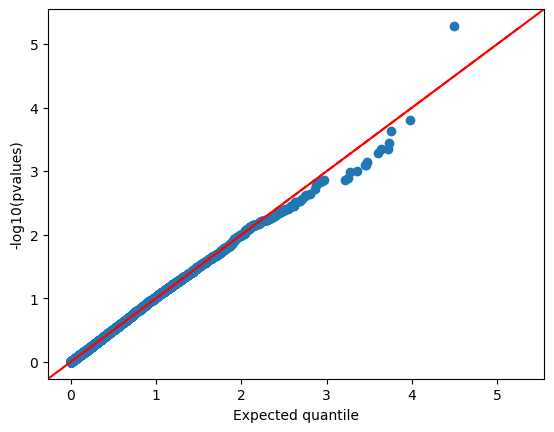

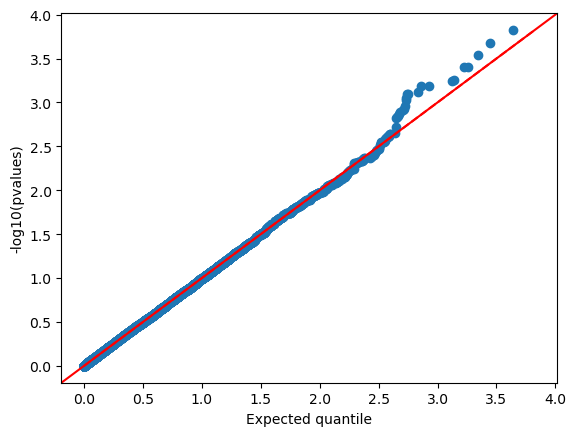

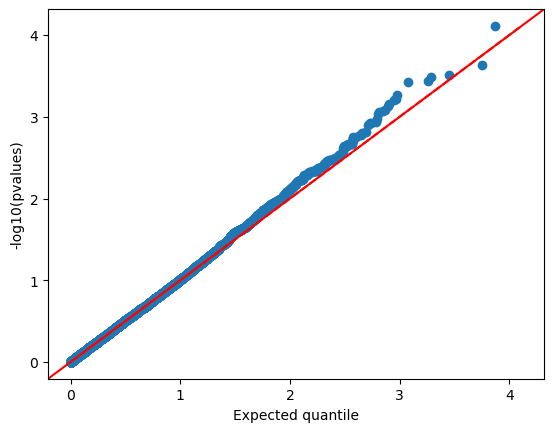

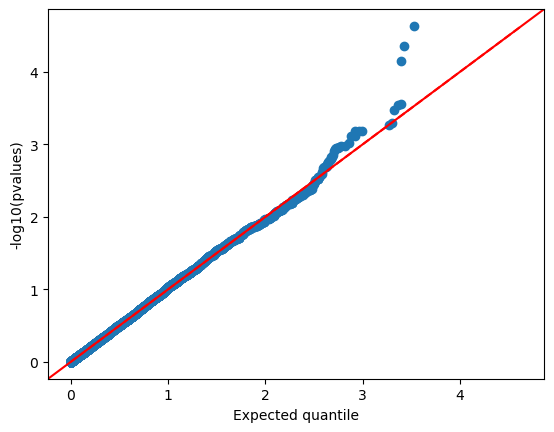

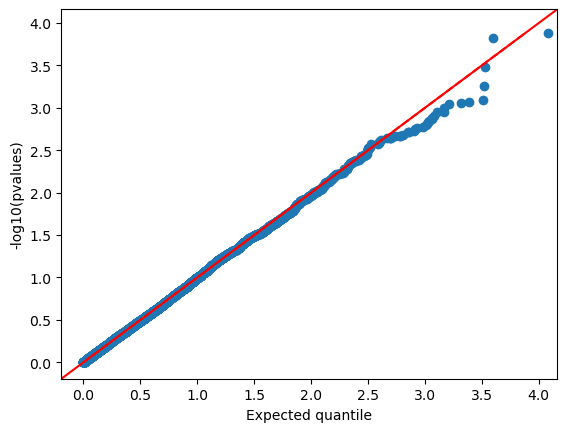

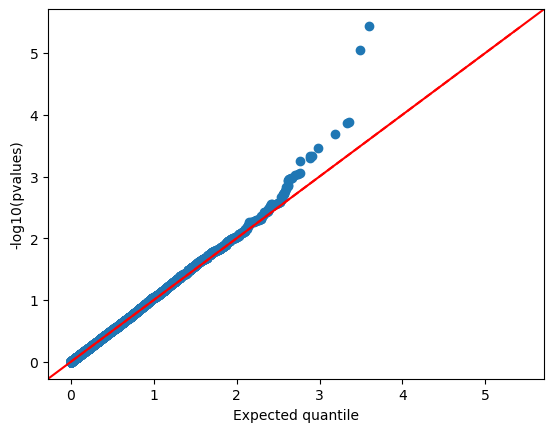

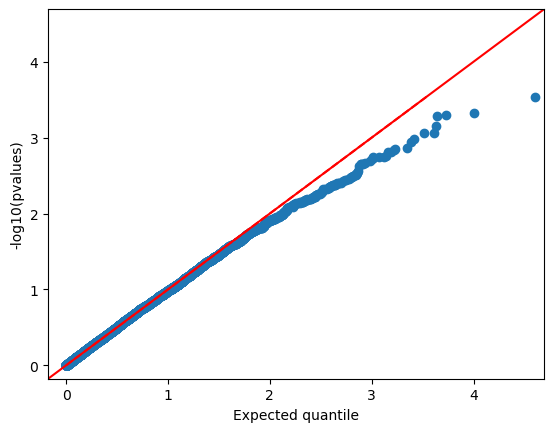

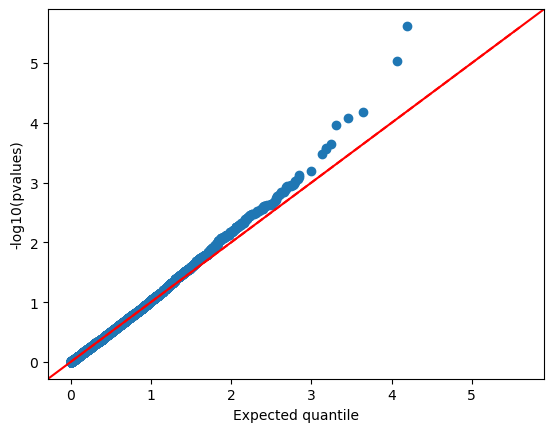

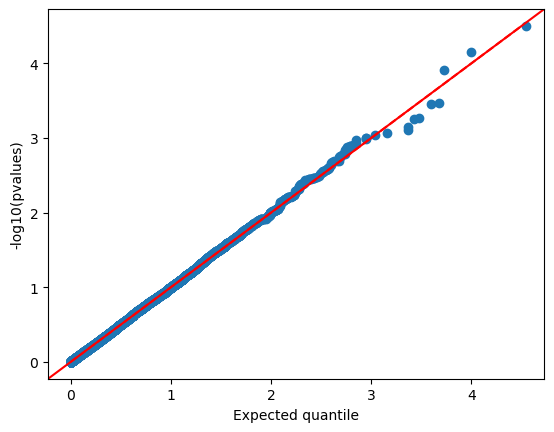

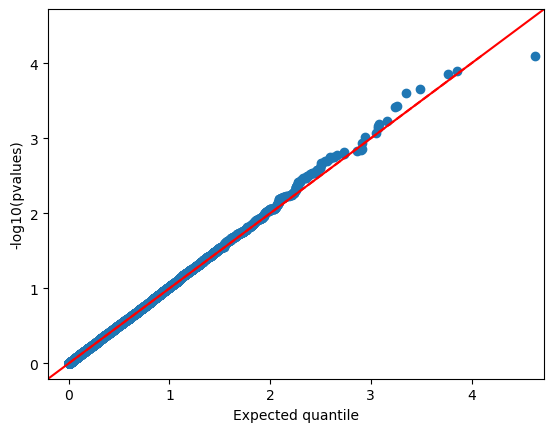

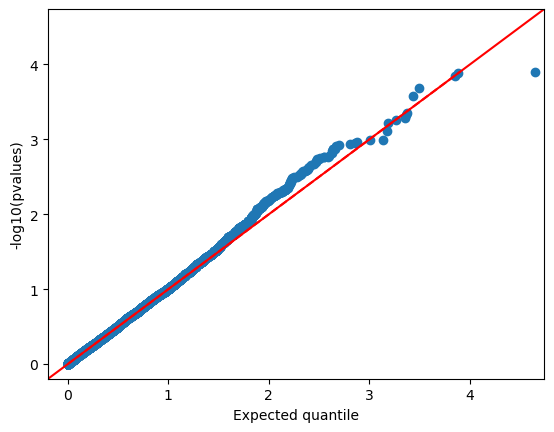

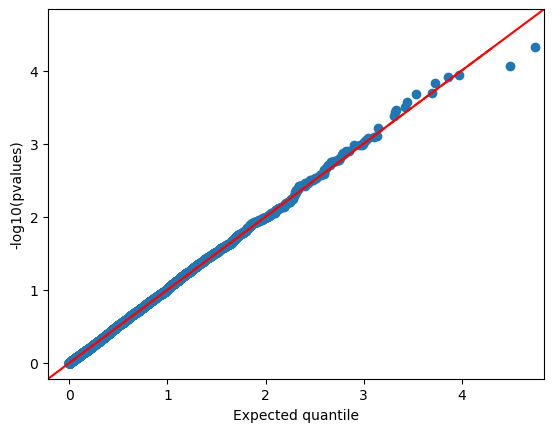

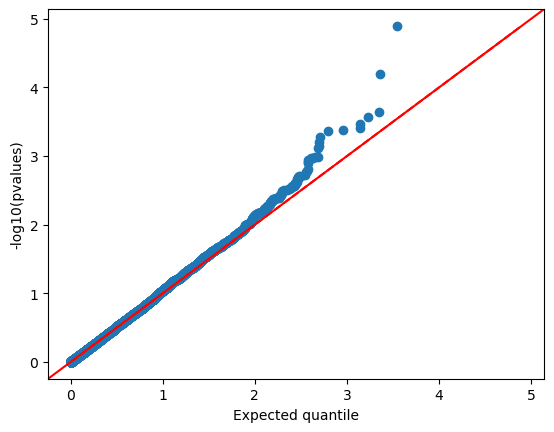

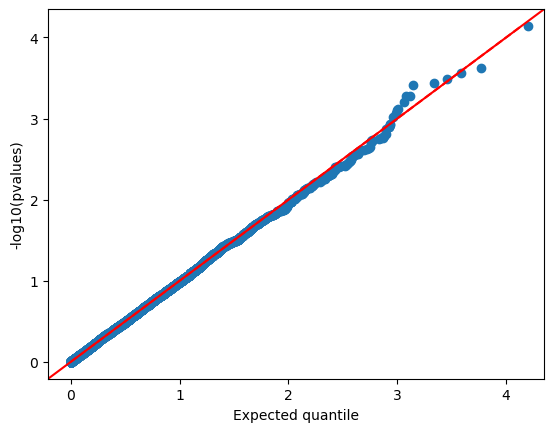

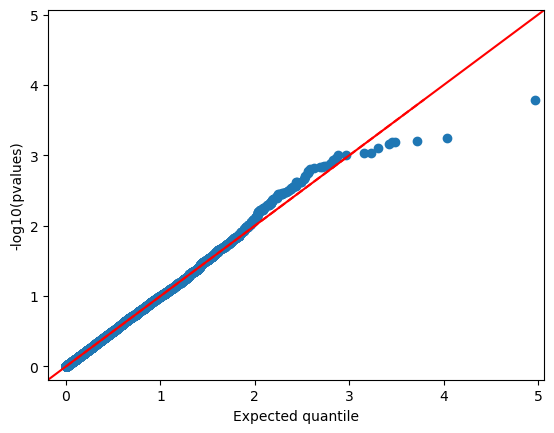

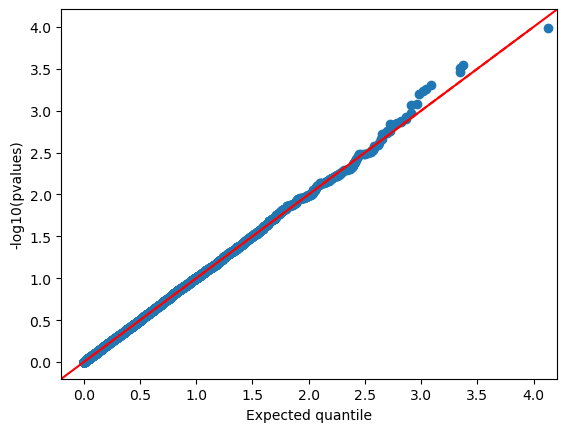

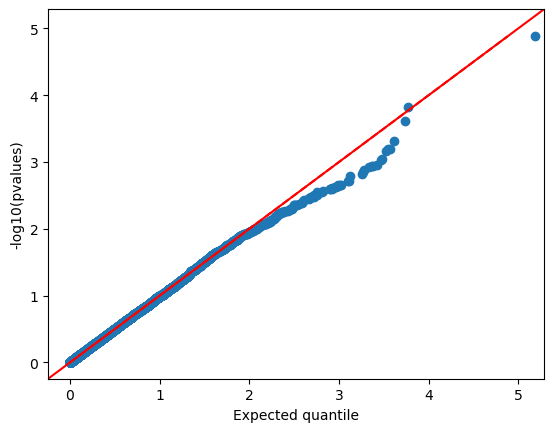

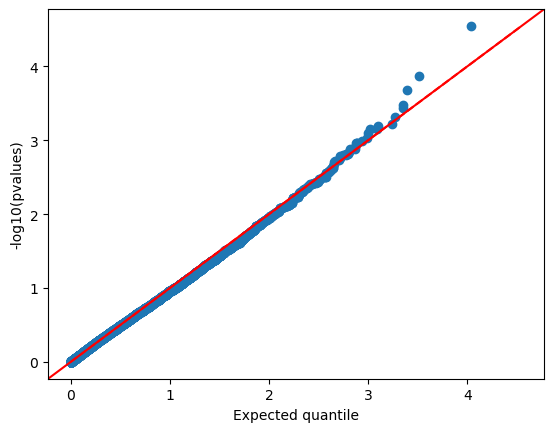

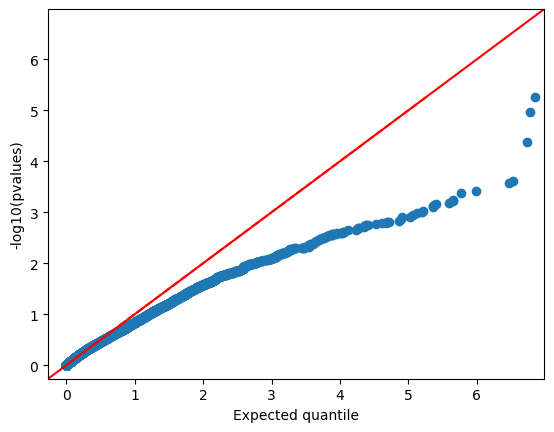

IndexError: single positional indexer is out-of-bounds

In [25]:
for i in range(1,21):
    bio1 = p_values.iloc[i,:].reset_index()
    
    bio1.columns = ['snp', 'pvalue']
    
    # Assuming pvalues is already defined and is a numpy array or similar
    pvalues = bio1['pvalue'] # Replace with your actual p-values
    
    # Generate expected quantiles from the exponential distribution
    expected_quantiles = np.random.exponential(scale=1/np.log(10), size=len(pvalues))
    
    # Convert p-values to -log10 scale
    observed_quantiles = -np.log10(pvalues)
    
    # QQ plot
    sm.qqplot_2samples(observed_quantiles, expected_quantiles, xlabel="Expected quantile", ylabel="-log10(pvalues)", line='45')
    
    # Add a y=x line
    plt.plot([min(expected_quantiles), max(expected_quantiles)], [min(expected_quantiles), max(expected_quantiles)], 'r--')
    
    plt.show()


In [9]:
# Parse command line arguments
number


99

In [45]:
number

99

In [10]:
import sys
import os
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import dask.dataframe as dd
import sys

path_ldp_af = '/carnegie/nobackup/scratch/xwu/grenet/merged_frequency/merged_hapFIRE_allele_frequency_LDpruned.txt'



# Use the train_samples list as needed
print(f"Number: {number}")
print(f"Train samples: {train_samples}")


# Here you can add code to use train_samples and test_samples within the newly created directory.
# For example, you might want to save some files related to the train/test data in this directory.
allele_freq = dd.read_csv(path_ldp_af, sep = '\t', usecols=train_samples)

allele_freq = allele_freq.compute() 

n_components = len(allele_freq.columns)

scaler = StandardScaler()
scaler.fit(allele_freq)
scaled = scaler.fit_transform(allele_freq)

scaled_allele_freq = pd.DataFrame(scaled, columns=allele_freq.columns)

# Perform PCA
pca = PCA(n_components=n_components)  # Set the desired number of components
pca.fit(scaled_allele_freq)

# Get the transformed data (projected onto the principal components)
transformed_data = pca.transform(scaled_allele_freq)

explain_var_ratio = pca.explained_variance_ratio_

cumulative_variance = np.cumsum(explain_var_ratio)

# Set the desired cumulative explained variance threshold
threshold = 0.96

# Find the number of components that exceed the threshold
num_components = np.sum(cumulative_variance <= threshold) + 1

Number: 99
Train samples: ['1_2_2', '1_2_3', '1_3_1', '1_3_4', '1_3_5', '1_3_6', '1_3_7', '1_3_8', '1_3_9', '1_3_10', '1_3_11', '1_3_12', '4_1_4', '4_3_1', '4_3_2', '4_3_3', '4_3_5', '4_3_6', '4_3_7', '4_3_8', '4_3_9', '4_3_10', '4_3_11', '4_3_12', '9_3_1', '9_3_2', '9_3_3', '9_3_4', '9_3_5', '9_3_6', '9_3_7', '9_3_8', '9_3_9', '9_3_10', '9_3_11', '9_3_12', '10_1_3', '10_1_4', '10_1_6', '10_1_7', '10_1_11', '10_1_12', '10_2_1', '10_2_5', '10_2_8', '10_2_9', '10_3_2', '10_3_10', '12_1_2', '12_1_3', '12_1_5', '12_1_6', '12_1_7', '12_1_8', '12_1_9', '12_2_4', '12_2_10', '12_2_11', '12_2_12', '13_1_6', '13_2_7', '13_3_1', '13_3_2', '13_3_3', '13_3_4', '13_3_5', '13_3_8', '13_3_9', '13_3_10', '13_3_11', '13_3_12', '23_1_1', '23_1_2', '23_1_3', '23_1_4', '23_1_5', '23_1_6', '23_1_7', '23_1_8', '23_1_9', '23_1_10', '23_1_11', '23_1_12', '24_1_1', '24_1_2', '24_1_3', '24_1_4', '24_1_5', '24_1_7', '24_1_9', '24_1_12', '24_2_10', '24_2_11', '25_2_1', '25_2_2', '25_2_3', '25_2_4', '25_2_5', '25_2

In [11]:
num_components

75

In [14]:
import matplotlib.pyplot as plt


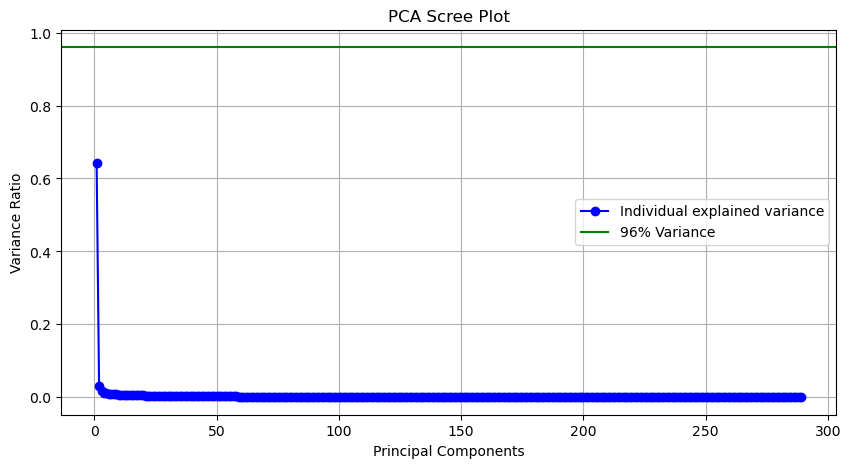

In [16]:
explain_var_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explain_var_ratio)

# Scree plot
plt.figure(figsize=(10, 5))
plt.plot(range(1, n_components + 1), explain_var_ratio, marker='o', linestyle='-', color='b', label='Individual explained variance')
#plt.plot(range(1, n_components + 1), cumulative_variance, marker='s', linestyle='--', color='r', label='Cumulative explained variance')

plt.title('PCA Scree Plot')
plt.xlabel('Principal Components')
plt.ylabel('Variance Ratio')
plt.axhline(y=0.96, color='g', linestyle='-', label='96% Variance')
plt.legend(loc='best')
plt.grid(True)
plt.show()

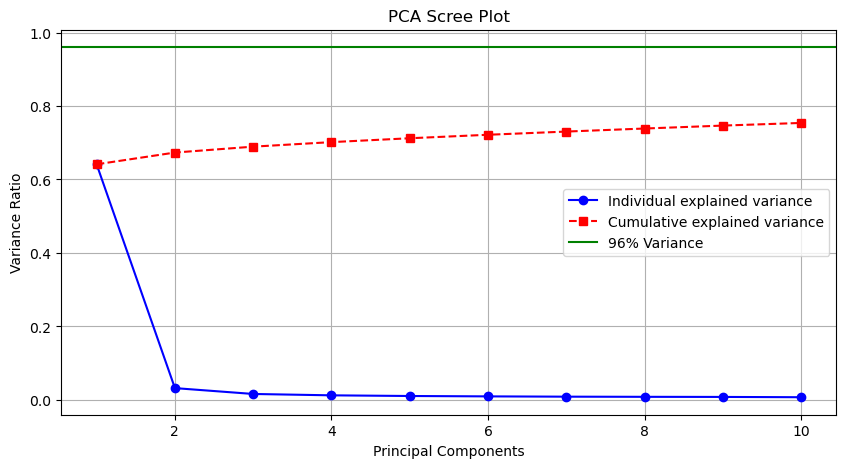

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

# Assuming your PCA and data preparation steps are already done and you have set n_components
# scaled_allele_freq = your_scaled_data_here
# n_components = max number of components you originally considered
# pca = PCA(n_components=n_components)
# pca.fit(scaled_allele_freq)

# Explained variance ratios
explain_var_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explain_var_ratio)

# Scree plot - limiting to first 10 components or total components if less than 10
max_display_components = min(10, len(explain_var_ratio))

plt.figure(figsize=(10, 5))
plt.plot(range(1, max_display_components + 1), explain_var_ratio[:max_display_components], marker='o', linestyle='-', color='b', label='Individual explained variance')
# Uncomment below if you want to show cumulative variance for the first 10 components
plt.plot(range(1, max_display_components + 1), cumulative_variance[:max_display_components], marker='s', linestyle='--', color='r', label='Cumulative explained variance')

plt.title('PCA Scree Plot')
plt.xlabel('Principal Components')
plt.ylabel('Variance Ratio')
plt.axhline(y=0.96, color='g', linestyle='-', label='96% Variance')
plt.legend(loc='best')
plt.grid(True)
plt.show()


In [48]:
pd.read_csv('/carnegie/nobackup/scratch/tbellagio/gea_grene-net/leave_1_out/split_number_0/environment_lea.csv')

,bio1,bio2,bio3,bio4,bio5,bio6,bio7,bio8,bio9,bio10,bio11,bio12,bio13,bio14,bio15,bio16,bio17,bio18,bio19
0,-0.819297,0.227674,-0.424091,-0.238307,-0.383044,-0.666583,0.471670,-1.770746,-0.272538,-1.019185,-0.545439,-0.142255,-0.361073,0.011995,-0.516721,-0.212594,0.019281,0.093093,0.290010
1,-0.819297,0.227674,-0.424091,-0.238307,-0.383044,-0.666583,0.471670,-1.770746,-0.272538,-1.019185,-0.545439,-0.142255,-0.361073,0.011995,-0.516721,-0.212594,0.019281,0.093093,0.290010
2,-0.819297,0.227674,-0.424091,-0.238307,-0.383044,-0.666583,0.471670,-1.770746,-0.272538,-1.019185,-0.545439,-0.142255,-0.361073,0.011995,-0.516721,-0.212594,0.019281,0.093093,0.290010
3,-0.819297,0.227674,-0.424091,-0.238307,-0.383044,-0.666583,0.471670,-1.770746,-0.272538,-1.019185,-0.545439,-0.142255,-0.361073,0.011995,-0.516721,-0.212594,0.019281,0.093093,0.290010
4,-0.819297,0.227674,-0.424091,-0.238307,-0.383044,-0.666583,0.471670,-1.770746,-0.272538,-1.019185,-0.545439,-0.142255,-0.361073,0.011995,-0.516721,-0.212594,0.019281,0.093093,0.290010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,1.308492,1.067598,2.202081,-0.484263,1.816345,0.959132,-0.042199,-0.334042,1.204808,1.075139,1.053645,-0.891835,-0.394237,-1.179430,2.449481,-0.202118,-1.492941,-1.426646,0.185633
283,1.308492,1.067598,2.202081,-0.484263,1.816345,0.959132,-0.042199,-0.334042,1.204808,1.075139,1.053645,-0.891835,-0.394237,-1.179430,2.449481,-0.202118,-1.492941,-1.426646,0.185633
284,1.308492,1.067598,2.202081,-0.484263,1.816345,0.959132,-0.042199,-0.334042,1.204808,1.075139,1.053645,-0.891835,-0.394237,-1.179430,2.449481,-0.202118,-1.492941,-1.426646,0.185633
285,1.308492,1.067598,2.202081,-0.484263,1.816345,0.959132,-0.042199,-0.334042,1.204808,1.075139,1.053645,-0.891835,-0.394237,-1.179430,2.449481,-0.202118,-1.492941,-1.426646,0.185633


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2


In [18]:
output_file_pvalue = '/carnegie/nobackup/scratch/tbellagio/gea_grene-net/leave_1_out/split_number_0/pvalues.csv'

output_file_zscores = '/carnegie/nobackup/scratch/tbellagio/gea_grene-net/leave_1_out/split_number_0/zscores.csv'

output_file_gif = '/carnegie/nobackup/scratch/tbellagio/gea_grene-net/leave_1_out/split_number_0/gif.csv'

output_file_qvalue = '/carnegie/nobackup/scratch/tbellagio/gea_grene-net/leave_1_out/split_number_0/qvalues.csv'


In [19]:
gif = pd.read_csv(output_file_gif)#.drop('Unnamed: 0',axis=1)

In [20]:
for i in range(20):
    
    ## get the gif for that biovar
    gif_biovar = gif.iloc[i, 1]

    ## get the scores
    zscores = pd.read_csv(output_file_zscores).drop('Unnamed: 0',axis=1)
    zscores_biovar = zscores.iloc[i,:]

    ## get the p values
    pvalues = pd.read_csv(output_file_pvalue).drop('Unnamed: 0',axis=1)
    pvalues_biovar = pvalues.iloc[i,:]

IndexError: index 19 is out of bounds for axis 0 with size 19

In [ ]:

# Example data for z-scores and genomic inflation factor
zscore = zscores_bio1.copy()  # Random normal values as z-scores
gif = 1.856250  # Default GIF from data

new_gif = 1.5  # New chosen GIF

# Manual adjustment of the p-values
adj_pv1 = 1 - chi2.cdf(zscore**2 / new_gif, df=1)

# Plotting the histograms
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.hist(pvalues_bio1, bins=30, color='skyblue')
plt.title("Unadjusted p-values")

plt.subplot(1, 3, 2)
plt.hist(1 - chi2.cdf(zscore**2 / gif, df=1), bins=30, color='lightgreen')
plt.title("GIF-adjusted p-values (GIF=2.8)")

plt.subplot(1, 3, 3)
plt.hist(adj_pv1, bins=30, color='salmon')
plt.title("Readjusted p-values (GIF=2.0)")

plt.tight_layout()
plt.show()


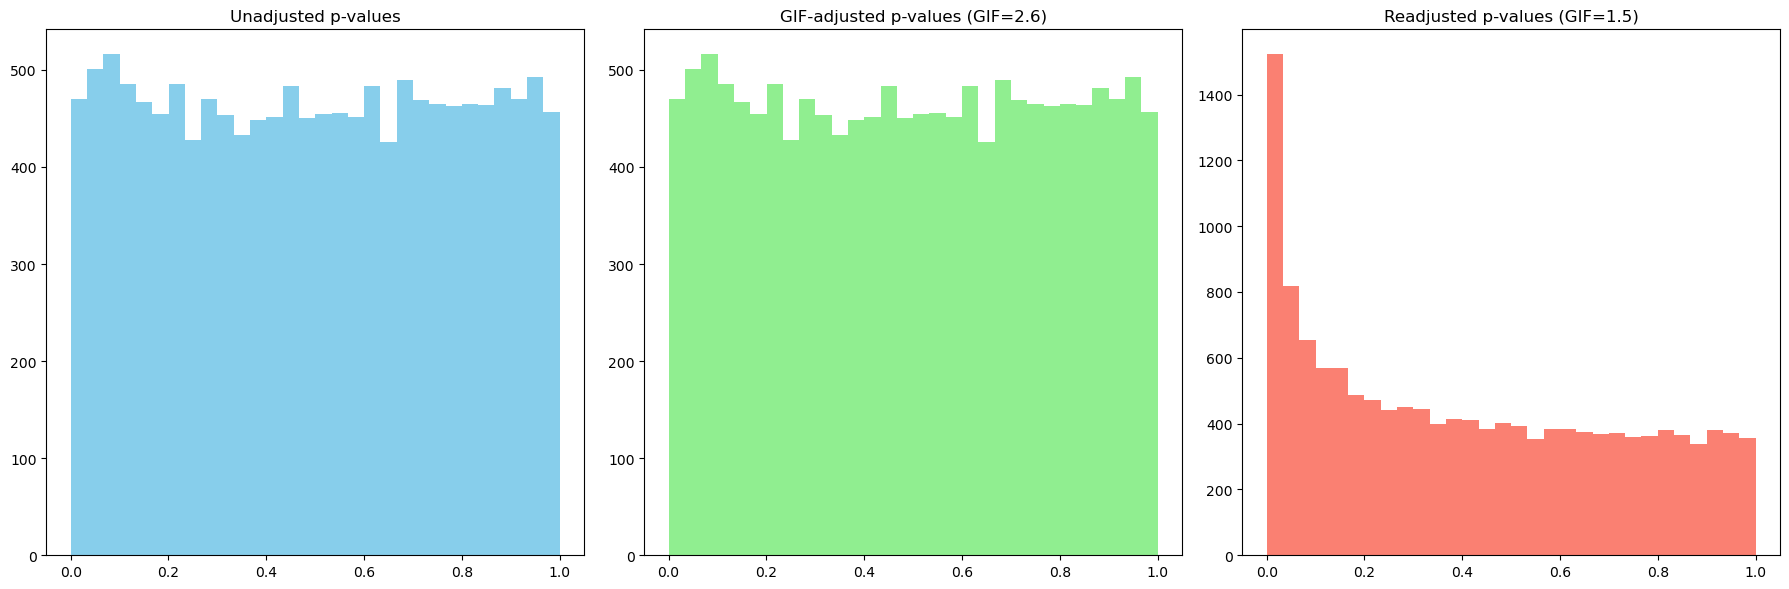

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2
import pandas as pd


zscores = pd.read_csv(output_file_zscores).drop('Unnamed: 0', axis=1)
zscores_bio1 = zscores.iloc[1, :]

pvalues = pd.read_csv(output_file_pvalue).drop('Unnamed: 0', axis=1)
pvalues_bio1 = pvalues.iloc[1, :]

# Example data for z-scores and genomic inflation factor
zscore = zscores_bio1.copy()  # Z-scores for the first predictor
gif = 2.552497  # Default GIF from data

new_gif = 1.5  # New chosen GIF

# Manual adjustment of the p-values
adj_pv1 = 1 - chi2.cdf(zscore**2 / new_gif, df=1)

# Plotting the histograms
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.hist(pvalues_bio1, bins=30, color='skyblue')
plt.title("Unadjusted p-values")

plt.subplot(1, 3, 2)
plt.hist(1 - chi2.cdf(zscore**2 / gif, df=1), bins=30, color='lightgreen')
plt.title(f"GIF-adjusted p-values (GIF={gif:.1f})")

plt.subplot(1, 3, 3)
plt.hist(adj_pv1, bins=30, color='salmon')
plt.title(f"Readjusted p-values (GIF={new_gif})")

plt.tight_layout()
plt.show()


In [80]:
pvalues_bio1

Response Y1        0.604750
Response Y2        0.548151
Response Y3        0.652637
Response Y4        0.164400
Response Y5        0.936230
                     ...   
Response Y13981    0.060976
Response Y13982    0.629723
Response Y13983    0.742740
Response Y13984    0.103270
Response Y13985    0.922869
Name: 1, Length: 13985, dtype: float64

In [79]:
p_corr = 1 - chi2.cdf(zscore**2 / gif, df=1)

In [81]:
p_corr

array([0.60475046, 0.54815148, 0.65263661, ..., 0.74273949, 0.10327006,
       0.92286874])

In [284]:
qvalues

,Response Y1,Response Y2,Response Y3,Response Y4,Response Y5,Response Y6,Response Y7,Response Y8,Response Y9,Response Y10,...,Response Y13976,Response Y13977,Response Y13978,Response Y13979,Response Y13980,Response Y13981,Response Y13982,Response Y13983,Response Y13984,Response Y13985
0,0.981127,0.981127,0.978710,0.982644,0.999927,0.999927,0.993797,0.978710,0.999927,0.999927,...,0.998130,0.999927,0.996947,0.999846,0.999927,0.999927,0.987477,0.999984,0.978710,0.999725
1,0.999927,0.999927,0.999927,0.982644,0.999927,0.999927,0.993797,0.997734,0.999725,0.978710,...,0.999927,0.997734,0.998991,0.997734,0.999927,0.978710,0.999927,0.999927,0.978710,0.999927
2,0.999927,0.999927,0.999927,0.987477,0.999927,0.999927,0.991377,0.997392,0.998947,0.978710,...,0.999725,0.997734,0.998859,0.998157,0.999927,0.978710,0.999927,0.999927,0.978710,0.999927
3,0.999927,0.999927,0.987477,0.999725,0.999927,0.999927,0.993219,0.999927,0.993797,0.999725,...,0.991316,0.999274,0.944794,0.982147,0.999927,0.978311,0.999927,0.998859,0.978710,0.999927
4,0.991316,0.999927,0.999846,0.988673,0.999927,0.999927,0.998859,0.998929,0.999725,0.978710,...,0.999927,0.997734,0.999927,0.997734,0.999927,0.978710,0.998947,0.999927,0.982644,0.999927
5,0.999927,0.999846,0.999927,0.982147,0.999927,0.999927,0.991316,0.994955,0.999725,0.978710,...,0.999927,0.994955,0.999914,0.998859,0.999927,0.978710,0.999927,0.999927,0.978710,0.999927
6,0.999725,0.978710,0.991316,0.993797,0.999927,0.993090,0.998859,0.991505,0.999927,0.978710,...,0.978710,0.999927,0.978710,0.999927,0.999927,0.999927,0.999927,0.998859,0.999927,0.999725
7,0.978710,0.999927,0.978710,0.999927,0.978710,0.999927,0.999927,0.999927,0.999927,0.999927,...,0.978710,0.999927,0.999927,0.987853,0.999725,0.999927,0.999927,0.999927,0.998715,0.985307
8,0.981127,0.999725,0.999927,0.978710,0.998859,0.999927,0.999927,0.998929,0.999927,0.999927,...,0.999927,0.999927,0.981127,0.997734,0.999927,0.978710,0.990984,0.999927,0.999927,0.996190
9,0.999927,0.991377,0.982147,0.999927,0.999927,0.999927,0.982147,0.991977,0.997734,0.997734,...,0.981127,0.997123,0.978710,0.993797,0.999927,0.978710,0.999927,0.999927,0.978710,0.999927


In [26]:
qvalues = pd.read_csv(output_file_qvalue).drop('Unnamed: 0',axis=1)

# Filtering to find where q-values are < 0.10
filtered_df = qvalues < 0.10

In [27]:
# Dictionary to store results
significant_snps = {}

# Iterate over each row in the filtered DataFrame
for env_var, is_significant in filtered_df.iterrows():
    # Get the list of SNP names where the q-value is < 0.10 for this environmental variable
    significant_snp_list = is_significant[is_significant].index.tolist()
    ## make it an actual index by substracting 0 and converting into int
    significant_index = pd.Series(significant_snp_list).str.replace('Response Y', '').astype(int) - 1
    significant_index = significant_index.tolist()
    # Store this list in the dictionary with the environmental variable as the key
    significant_snps[env_var] = significant_index

In [28]:
significant_snps

{0: [],
 1: [],
 2: [],
 3: [],
 4: [],
 5: [],
 6: [],
 7: [],
 8: [],
 9: [],
 10: [],
 11: [],
 12: [],
 13: [],
 14: [],
 15: [],
 16: [8840],
 17: [],
 18: [52,
  267,
  382,
  644,
  1619,
  2292,
  2565,
  5297,
  5602,
  6898,
  7546,
  8501,
  9292,
  9388,
  11599,
  12059,
  13254,
  13450]}

In [29]:
filtered_df.sum(axis=1)

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     1
17     0
18    18
dtype: int64

In [30]:
# Counting the True values per row, which indicate q-values < 0.10
count_snps = filtered_df.sum(axis=0)

# Printing the results
print(count_snps)

Response Y1        0
Response Y2        0
Response Y3        0
Response Y4        0
Response Y5        0
                  ..
Response Y13981    0
Response Y13982    0
Response Y13983    0
Response Y13984    0
Response Y13985    0
Length: 13985, dtype: int64


In [31]:
significant = count_snps[count_snps !=0].index.values

In [32]:
significant_index = pd.Series(significant).str.replace('Response Y', '').astype(int) - 1

In [33]:
significant_index

0        52
1       267
2       382
3       644
4      1619
5      2292
6      2565
7      5297
8      5602
9      6898
10     7546
11     8501
12     8840
13     9292
14     9388
15    11599
16    12059
17    13254
18    13450
dtype: int64

In [34]:
train_samples = splits_samples[0][0]
train_samples = splits_samples[0][1]

In [24]:
env = pd.read_csv('/carnegie/nobackup/scratch/tbellagio/gea_grene-net/leave_1_out/split_number_0/environment_lea.csv')

In [112]:
allele_freq_sig = allele_freq.iloc[significant_index.values, :]

In [130]:
import seaborn as sns

<Axes: xlabel='bio19', ylabel='13450'>

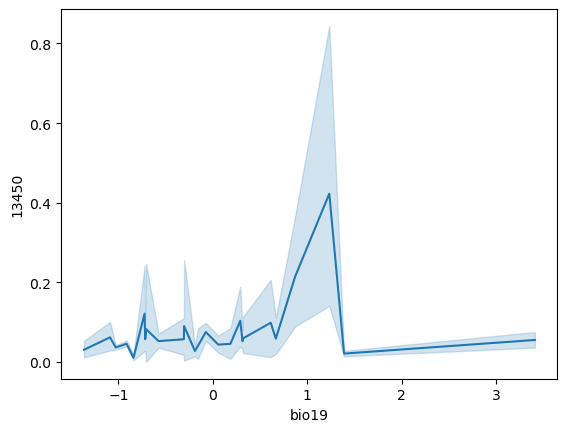

In [137]:
sns.lineplot(x = env_data['bio19'], y = y)

In [207]:
## for a given site 
## for site 4 bio19 is  -1.763503


In [210]:
X

,const,bio19
0,1.0,0.290010
1,1.0,0.290010
2,1.0,0.290010
3,1.0,0.290010
4,1.0,0.290010
...,...,...
282,1.0,0.185633
283,1.0,0.185633
284,1.0,0.185633
285,1.0,0.185633


In [39]:
import pandas as pd
import statsmodels.api as sm

path_ldp_af = '/carnegie/nobackup/scratch/xwu/grenet/merged_frequency/merged_hapFIRE_allele_frequency_LDpruned.txt'

allele_freq = pd.read_csv(path_ldp_af, sep = '\t', usecols=train_samples)

# Load your data (adjust paths and column names as necessary)
geno_data = allele_freq.copy()
env_data = env.copy()  # DataFrame of environmental data

# List of indices for significant SNPs
significant_snp_indices = significant_index # Example indices

# Prepare a dictionary to store results
results = {}

# Loop through each significant SNP index
for index in significant_index:
    # Prepare the X (predictor) and Y (response) variables
    X = env_data['bio19']  # Adjust 'Env_Variable' to your specific environmental variable
    X = sm.add_constant(X)  # Adds a constant term to the predictor
    y = geno_data.iloc[index, :].reset_index(drop=True)   # Assumes each column in geno_data is a SNP
    
    # Create a figure for each plot
    #plt.figure(figsize=(10, 6))  # You can adjust the size as needed
    #sns.lineplot(x=env_data['bio19'], y=y)
    #plt.title(f'Regression Plot for SNP Index {index}')
    #plt.xlabel('bio19')
    #plt.ylabel('Allele Frequency')

    
    model = sm.OLS(y, X).fit()

    # New x values for prediction
    new_x_values = np.array([-1.763503, 2.50])
    new_X = sm.add_constant(new_x_values)  # Don't forget to add a constant to match your model's design

    # Predict y using the fitted model
    y_pred = model.predict(new_X)

    # Store results and predictions
    results[index] = {
        'intercept': model.params['const'],
        'beta': model.params['bio19'],
        'p_value': model.pvalues['bio19'],
        'r_squared': model.rsquared,
        'predicted_y': y_pred  # Store the predicted values
    }


ValueError: The indices for endog and exog are not aligned

In [ ]:
results_df = pd.DataFrame.from_dict(results, orient='index')

In [40]:
test_samples = splits_samples[0][1]

In [41]:
#### training 

path_ldp_af = '/carnegie/nobackup/scratch/xwu/grenet/merged_frequency/merged_hapFIRE_allele_frequency_LDpruned.txt'

allele_freq = dd.read_csv(path_ldp_af, sep = '\t', usecols=train_samples)

clim_sites_during_exp = pd.read_csv('/carnegie/nobackup/scratch/tbellagio/grene/data/bioclimvars_experimental_sites_era5.csv')

sites_af = pd.Series(allele_freq.columns.str.split('_').str[0]).astype(int)

sites_af.name = 'site'

env = sites_af.reset_index().merge(clim_sites_during_exp).drop(['index'],axis=1)

##scale it
means = {}
stds = {}
for i in env.columns[1:]:
    means[i] = np.mean(env[i])
    stds[i] = np.std(env[i])
    env[i] = (env[i] - np.mean(env[i])) / np.std(env[i])

env = env.drop('site',axis=1)

#env.to_csv(f'split_number_{number}/environment_lea.csv', sep = ',', index=False)


In [42]:
path_ldp_af = '/carnegie/nobackup/scratch/xwu/grenet/merged_frequency/merged_hapFIRE_allele_frequency_LDpruned.txt'

allele_freq = dd.read_csv(path_ldp_af, sep = '\t', usecols=test_samples)

clim_sites_during_exp = pd.read_csv('/carnegie/nobackup/scratch/tbellagio/grene/data/bioclimvars_experimental_sites_era5.csv')

sites_af = pd.Series(allele_freq.columns.str.split('_').str[0]).astype(int)

sites_af = sites_af.drop_duplicates()

sites_af.name = 'site'

env_test = sites_af.reset_index().merge(clim_sites_during_exp).drop(['index'],axis=1)

##scale it for the testing we used the saved mean and std
for i in env_test.columns[1:]:
    env_test[i] = (env_test[i] - means[i]) / stds[i]

#env = env.drop('site',axis=1)
#env.to_csv(f'split_number_{number}/environment_lea.csv', sep = ',', index=False)



In [43]:
env_test['site'].to_list()

[4, 24, 48, 52, 55, 57]

In [45]:
import pandas as pd
import statsmodels.api as sm

path_ldp_af = '/carnegie/nobackup/scratch/xwu/grenet/merged_frequency/merged_hapFIRE_allele_frequency_LDpruned.txt'

allele_freq = pd.read_csv(path_ldp_af, sep = '\t', usecols=train_samples)

# Load your data (adjust paths and column names as necessary)
geno_data = allele_freq.copy()
env_data = env.copy()  # DataFrame of environmental data

# List of indices for significant SNPs
significant_snp_indices = significant_index # Example indices

# Prepare a dictionary to store results
results = {}

# Loop through each significant SNP index
for index in significant_index:
    # Prepare the X (predictor) and Y (response) variables
    X = env_data['bio19']  # Adjust 'Env_Variable' to your specific environmental variable
    X = sm.add_constant(X)  # Adds a constant term to the predictor
    y = geno_data.iloc[index, :].reset_index(drop=True)   # Assumes each column in geno_data is a SNP
    
    # Create a figure for each plot
    #plt.figure(figsize=(10, 6))  # You can adjust the size as needed
    #sns.lineplot(x=env_data['bio19'], y=y)
    #plt.title(f'Regression Plot for SNP Index {index}')
    #plt.xlabel('bio19')
    #plt.ylabel('Allele Frequency')

    
    model = sm.OLS(y, X).fit()

    # New x values for prediction
    new_x_values = env_test['bio19'].values
    new_X = sm.add_constant(new_x_values)  # Don't forget to add a constant to match your model's design

    # Predict y using the fitted model
    y_pred = model.predict(new_X)

    # Store results and predictions
    results[index] = {
        'intercept': model.params['const'],
        'beta': model.params['bio19'],
        'p_value': model.pvalues['bio19'],
        'r_squared': model.rsquared,
        'predicted_y': y_pred  # Store the predicted values
    }

In [46]:
env_test['bio19']

0   -0.903974
1    2.003141
2    0.063197
3   -1.065298
4    0.534096
5   -0.286772
Name: bio19, dtype: float64

In [47]:
## for site 1 

In [48]:
matrix_results = {}
for snp in results.keys():
    one_snp = []
    for index_biovar, biovar in enumerate(env_test['site']):
        exp_af = results[snp]['predicted_y'][index_biovar]
        one_snp.append(exp_af)
    matrix_results[snp] = one_snp

In [49]:
matrix_results = pd.DataFrame.from_dict(matrix_results, orient='index')
matrix_results.columns = env_test['site'].to_list()

In [50]:
matrix_results

,4,24,48,52,55,57
52,0.039317,0.027088,0.035248,0.039995,0.033268,0.036721
267,0.198907,-0.001348,0.132284,0.210020,0.099846,0.156391
382,0.044057,0.055682,0.047924,0.043412,0.049807,0.046525
644,0.027848,0.116869,0.057464,0.022908,0.071884,0.046748
1619,0.061855,0.070844,0.064846,0.061357,0.066302,0.063764
2292,0.034807,0.047364,0.038985,0.034110,0.041019,0.037473
2565,0.917230,0.907404,0.913961,0.917775,0.912370,0.915144
5297,0.029408,0.037002,0.031935,0.028987,0.033165,0.031021
5602,0.244211,-0.041993,0.148994,0.260093,0.102634,0.183448
6898,0.057367,0.044503,0.053087,0.058081,0.051003,0.054636


In [51]:
matrix_results.index

Index([   52,   267,   382,   644,  1619,  2292,  2565,  5297,  5602,  6898,
        7546,  8501,  8840,  9292,  9388, 11599, 12059, 13254, 13450],
      dtype='int64')

In [52]:
## get the vcf file frothe chromosomes and positions 
import allel
## ld pruned vcf file
ld_prunned_vcf_file = '/carnegie/nobackup/scratch/xwu/grenet/hapFIRE_updatedVCF/greneNet_final_v1.1_LDpruned.recode.vcf'
ld_prunned_vcf = allel.read_vcf(ld_prunned_vcf_file)

In [53]:
ld_prunned_chrom = ld_prunned_vcf['variants/CHROM']
ld_prunned_pos = ld_prunned_vcf['variants/POS']

In [54]:
index_pos = {}
for index, pos in enumerate(ld_prunned_pos):
    index_pos[index] = pos

In [55]:
real_positions = []
for i in matrix_results.index:
    real_pos = index_pos[i]
    real_positions.append(real_pos)

In [56]:
#matrix_results.index = real_positions

In [57]:
ld_prunned_vcf['calldata/GT'].shape

(13985, 231, 2)

In [58]:
len(matrix_results.index)

19

In [59]:
selected_snps = ld_prunned_vcf['calldata/GT'][matrix_results.index, :, :]

In [60]:
selected_snps.shape

(19, 231, 2)

In [61]:
genotype_counts = np.sum(selected_snps, axis=2)

In [62]:
genotype_counts.shape

(19, 231)

In [63]:
genotype_counts

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 2, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 2],
       [2, 0, 0, ..., 0, 0, 2]])

In [64]:
len(ld_prunned_pos)

13985

In [3]:
import sys
sys.path.append('/home/tbellagio/miniforge3/envs/pipeline_snakemake/lib/python3.9/site-packages')
import cvxpy

/home/tbellagio/.local/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [65]:
import numpy as np
import cvxpy as cp

In [68]:
np.asarray(matrix_results[4])

array([0.03931685, 0.19890689, 0.04405682, 0.02784783, 0.06185549,
       0.03480725, 0.91723018, 0.02940837, 0.24421111, 0.05736675,
       0.14702477, 0.03553881, 0.18626661, 0.87067292, 0.07238665,
       0.08651136, 0.03639179, 0.03971899, 0.04723094])

In [69]:
y = np.asarray(matrix_results[4]) * 2


In [70]:
h = cp.Variable(231)

In [72]:
product = genotype_counts @ h 

In [73]:
diff = product - y

In [74]:
constraints = [0 <= h, sum(h) == 1]


In [75]:
problem = cp.Problem(cp.Minimize(cp.norm(diff)), constraints)

# Solve the optimization problem using the SCS solver, with verbose output disabled.
problem.solve(solver='SCS', verbose=False)


6.661155779637421e-09

In [77]:
h.value.shape

(231,)

In [78]:
ecotype_frequency = h.value

In [ ]:


# `y` represents the haplotype frequency, for me the allele frequency 
## i?? take it away  this is because you do it per haplotype block?? 
## 
y = np.asarray(independent_block_haplotype_frequency[i]) * 2

# Create a variable `h` using CVXPY, which represents the frequencies of ecotypes??.
# Its dimension is set to match 231?? 
h = cp.Variable(haplotype.shape[0])

# `product` computes the dot product of the transpose of the haplotype design matrix with the vector `h`.
# for me the haplotype sedign matrix is gonna be the genotype matrix??? 
product = independent_haplotype_DM_.T @ h 

# Calculate the residuals `diff` by subtracting the observed frequencies `y` from the modeled `product`.
diff = product - y

# Define constraints for the optimization problem:
# 1. All elements of `h` must be non-negative.
# 2. The sum of all elements in `h` must equal 1 (ensuring that `h` represents a probability distribution).
constraints = [0 <= h, sum(h) == 1]

# Formulate the optimization problem:
# The objective is to minimize the norm of the residuals `diff`.
# This norm minimization helps in fitting the model close to the observed data.
problem = cp.Problem(cp.Minimize(cp.norm(diff)), constraints)

# Solve the optimization problem using the SCS solver, with verbose output disabled.
problem.solve(solver='SCS', verbose=False)

# Store the solution of `h` (the estimated haplotype frequencies) in `ecotype_frequency` at index `i`.
## for you it was an index becasue it was at haplotype block i ???? 
ecotype_frequency[i, :] = h.value

# `weights` is a list that stores the distance between variants to perhaps weigh the influence of each segment.
# Here, it appends the distance between the right and left variant positions.
weights.append(variant_positions[right] - variant_positions[left])

In [ ]:
env_test['bio19'] 

In [191]:
## for snps 152 and site 4 
## this should be the allele freq 
expected_allelefreq = 0.416997 + (0.010695 * -1.763503)

if at snp 152 ecotype 2 has a 

0.398136335415

In [185]:
results_df

,intercept,beta,p_value,r_squared
152,0.416997,0.010695,0.466862,0.001859
367,0.528988,-0.009154,0.495087,0.001635
482,0.077808,-0.000422,0.943181,0.000018
744,0.064272,-0.000596,0.925689,0.000031
1719,0.792472,0.019080,0.088160,0.010168
2392,0.097852,-0.016911,0.027985,0.016830
2665,0.451933,0.012962,0.329471,0.003337
5397,0.593487,-0.007974,0.536549,0.001342
5702,0.091224,0.002247,0.745548,0.000370
6998,0.478093,0.020874,0.129985,0.008026


In [23]:
transposed = '/carnegie/nobackup/scratch/tbellagio/gea_grene-net/leave_1_out/split_number_0/transposed.csv'

In [25]:
for i in [0]:
    output_file_pvalue = f'/carnegie/nobackup/scratch/tbellagio/gea_grene-net/leave_1_out/split_number_{str(i)}/pvalues_full_genome.csv'
    
    output_file_zscores = f'/carnegie/nobackup/scratch/tbellagio/gea_grene-net/leave_1_out/split_number_{str(i)}/zscores_full_genome.csv'
    
    output_file_gif = f'/carnegie/nobackup/scratch/tbellagio/gea_grene-net/leave_1_out/split_number_{str(i)}/gif_full_genome.csv'
    
    output_file_qvalue = f'/carnegie/nobackup/scratch/tbellagio/gea_grene-net/leave_1_out/split_number_{str(i)}/qvalues_full_genome.csv'
    
    
    #gif = pd.read_csv(output_file_gif)#.drop('Unnamed: 0',axis=1)

    qvalues = pd.read_csv(transposed, nrows=1000)
    
    qvalues = qvalues.drop('Unnamed: 0',axis=1)
    
    #qvalues = pd.read_csv(output_file_qvalue).drop('Unnamed: 0',axis=1)
    
    # Filtering to find where q-values are < 0.10
    filtered_df = qvalues < 0.1

In [26]:
filtered_df

,X1,X2
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
995,False,False
996,False,False
997,False,False
998,False,False
